In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from forecastflow.preprocess import handle_missing_data, resample_data, detrend_data

In [7]:
# Example time series data
date_rng = pd.date_range(start='2020-01-01', end='2022-01-01', freq='D')  # Extended to two years
data = np.sin(2 * np.pi * date_rng.dayofyear / 365)
noise = np.random.normal(0, 0.1, len(date_rng))
data_with_noise = data + noise

In [8]:
# Insert missing values
data_with_missing = pd.Series(data_with_noise, index=date_rng)
data_with_missing[30:35] = np.nan
data_with_missing[100:110] = np.nan

In [23]:
# 1. Handling missing data
filled_data = handle_missing_data(pd.Series(data_with_missing, index=date_rng), method='interpolation', inplace=False)

In [10]:
# 2. Resampling data
resampled_data = resample_data(pd.Series(data_with_noise, index=date_rng), freq='W', method='mean')

In [11]:
# 3. Detrending data
# Subtraction method
detrended_data_sub = detrend_data(pd.Series(data_with_noise, index=date_rng), method='subtraction')

# Differencing method
detrended_data_diff = detrend_data(pd.Series(data_with_noise, index=date_rng), method='differencing', lag=1)

# Seasonal decomposition method
detrended_data_seasonal = detrend_data(pd.Series(data_with_noise, index=date_rng), method='seasonal_decomposition', period=365)

# Wavelet method
detrended_data_wavelet = detrend_data(pd.Series(data_with_noise, index=date_rng), method='wavelet', wavelet='db4', level=1)

In [29]:
detrended_data_diff

2020-01-02    0.082224
2020-01-03    0.152701
2020-01-04   -0.255669
2020-01-05    0.100894
2020-01-06    0.039473
                ...   
2021-12-28   -0.198417
2021-12-29    0.179520
2021-12-30    0.071870
2021-12-31   -0.090209
2022-01-01   -0.179591
Freq: D, Length: 731, dtype: float64

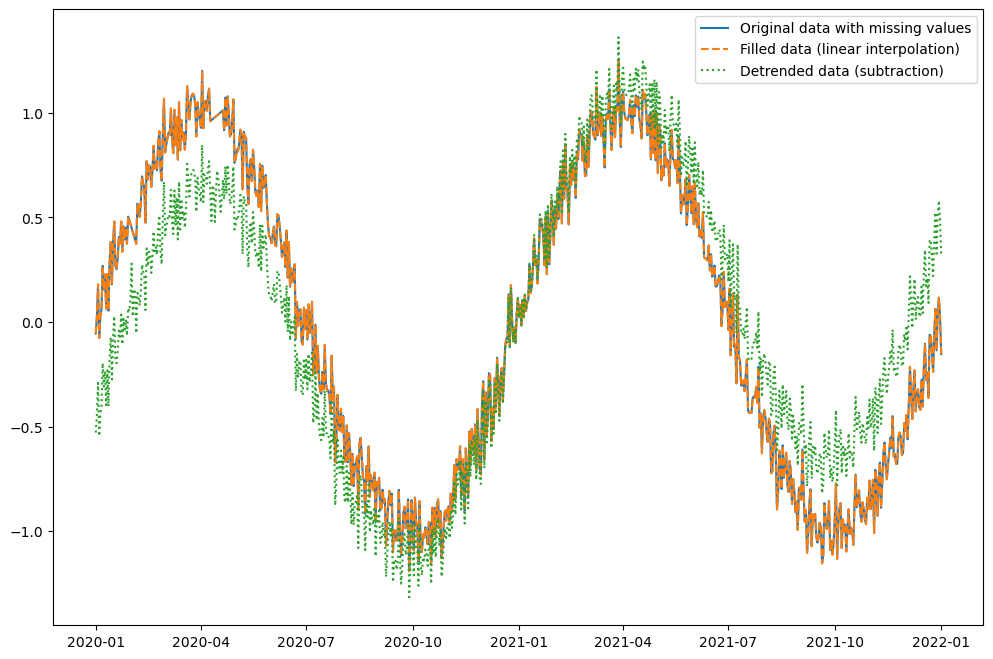

In [25]:
# Plot original data, filled data, and detrended data
plt.figure(figsize=(12, 8))
plt.plot(date_rng, data_with_missing, label='Original data with missing values')
plt.plot(date_rng, filled_data, label='Filled data (linear interpolation)', linestyle='--')
plt.plot(date_rng, detrended_data_sub, label='Detrended data (subtraction)', linestyle=':')
plt.legend()
plt.show()

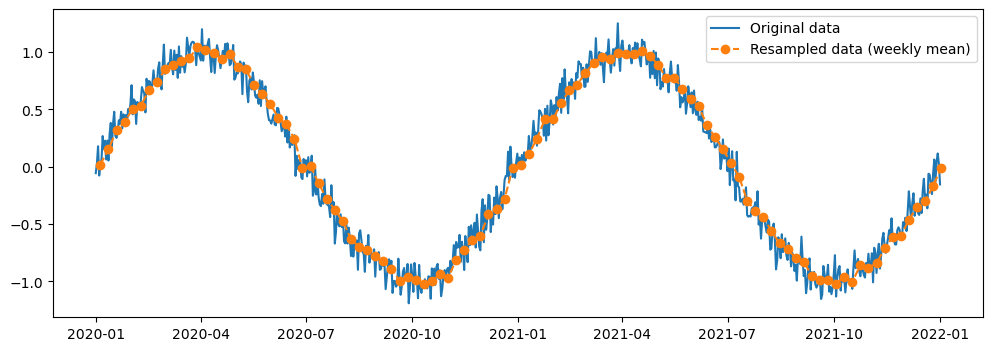

In [26]:
# Plot resampled data
plt.figure(figsize=(12, 4))
plt.plot(date_rng, data_with_noise, label='Original data')
plt.plot(resampled_data.index, resampled_data, label='Resampled data (weekly mean)', linestyle='--', marker='o')
plt.legend()
plt.show()

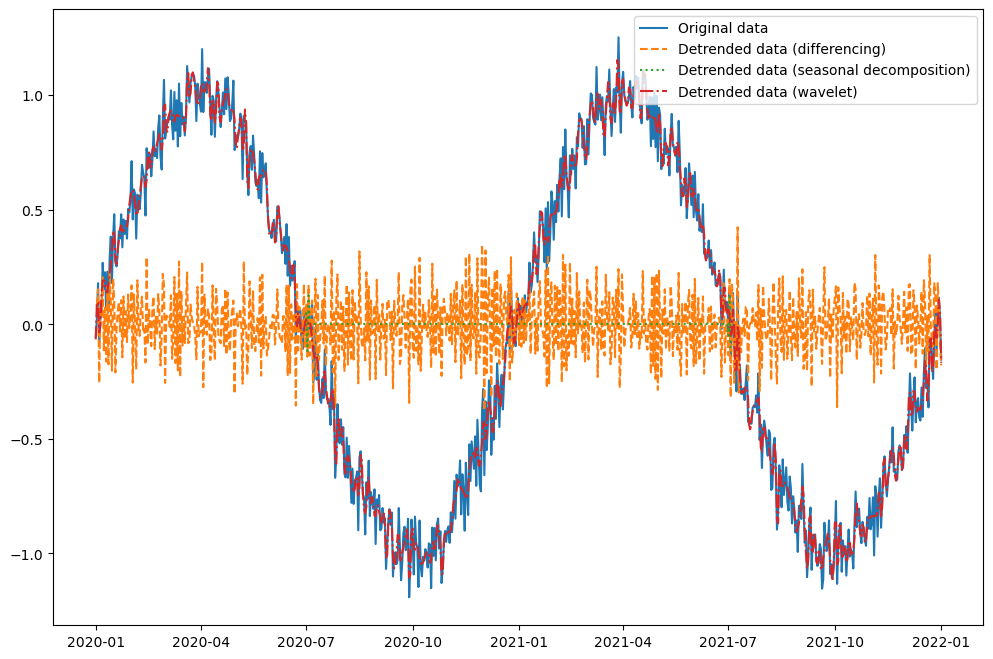

In [31]:
# Plot detrended data (differencing, seasonal decomposition, wavelet)
plt.figure(figsize=(12, 8))
plt.plot(date_rng, data_with_noise, label='Original data')
plt.plot(date_rng[1:], detrended_data_diff, label='Detrended data (differencing)', linestyle='--')
plt.plot(detrended_data_seasonal.index, detrended_data_seasonal, label='Detrended data (seasonal decomposition)', linestyle=':')
plt.plot(date_rng, detrended_data_wavelet, label='Detrended data (wavelet)', linestyle='-.')
plt.legend()
plt.show()